In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("../deeplearning.mplstyle")

from utils import plot_data, dlc

## Dataset

In [62]:
heart_csv = "../data-raw/heart.csv"

In [103]:
with open(heart_csv, "r") as input_data:
    df = pd.read_csv(input_data)

In [105]:
df = df[["oldpeak", "thal", "target"]]
df = df.sample(50)
df.head()

,oldpeak,thal,target
288,3.0,3,0
159,0.0,3,1
26,1.6,2,1
206,1.2,3,0
302,0.0,2,0


In [114]:
# X_train = df.drop(["target"], axis=1).to_numpy() # (m,n)
# y_train = df["target"].to_numpy() # (m,)

# X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
# y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

# Tumor size example to make sense of it all
X_train = np.array([
    [0.5, 1],
    [0.75, 1.2],
    [0.43, 0.9],
    [0.80, 1.3],
    [0.62, 1.1],
    [1.2, 2.3],
    [1.2, 2.5],
    [1.5, 2.66],
    [1.35, 2.52],
    [1.44, 2.44]
])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [115]:
X_train

array([[0.5 , 1.  ],
       [0.75, 1.2 ],
       [0.43, 0.9 ],
       [0.8 , 1.3 ],
       [0.62, 1.1 ],
       [1.2 , 2.3 ],
       [1.2 , 2.5 ],
       [1.5 , 2.66],
       [1.35, 2.52],
       [1.44, 2.44]])

In [116]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

We use a helper function to plot our data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as blue circles.

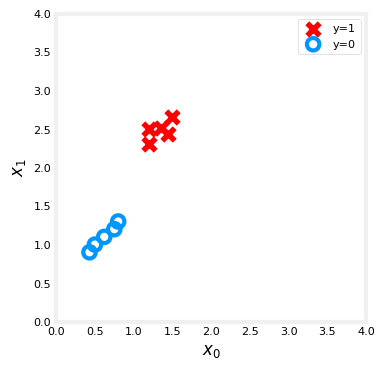

In [117]:
fix, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_train, y_train, ax)

# Set both axes
# ax.axis([20, 85, -3, 3])
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Cost Function

Recall that loss is defined to to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.

Recall that for logistic regression, the cost function is the form

$$
J(\vec{w},b) = \frac{1}{m}\sum\limits_{i=1}^{m}[L(f_{\vec{w},b}(\vec{\textbf{x}}^{i}, y^{i}))] \tag{1}
$$

where

- $L(f_{\vec{w},b}(\vec{\textbf{x}}^{i}, y^{i}))$ is the cost for a single data point, which is

$$
L(f_{\vec{w},b}(\vec{\textbf{x}}^{i}, y^{i})) = -y^{i}\log(f_{\vec{w},b}(\vec{\textbf{x}}^{i})) - (1-y^{i})\log(1-f_{\vec{w},b}(\vec{\textbf{x}}^{i})) \tag{2}
$$

- where $m$ is the number of training examples in the data set and:

$$
\begin{align*}
f_{\vec{w},b}(\vec{\textbf{x}}^{i}) = g(z^{i}) \tag{3} \newline
z^{i} = \vec{w}*\vec{\textbf{x}} + b \tag{4} \newline
g(z^{i}) = \frac{1}{1+e^{-z^{i}}} \tag{5}
\end{align*}
$$


### Cost Function Algorithm

- Create a variable outside the loop to store the costs
- Loop over all examples in the training set
  - Calculate the loss for each training example
    - Calculate **(4)** above
    - Predict $f_{\vec{w},b}(x^{(i)})$, where $g$ is the sigmoid function **(5)**
    - Calculate the loss for this example, equation **(2)** above
      - Add this cost to the total cost variable created outside the loop
- Get the sum of cost from all iterations and return the total divided by the number of examples

In [78]:
def sigmoid(z):
    g = 1.0 / (1.0 + np.exp(-z))
    return g

def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        fwb_i = sigmoid(z_i)
        cost += -y[i]*np.log(fwb_i) - (1-y[i])*np.log(1-fwb_i)
    cost = cost / m

    return cost

In [119]:
w_tmp = np.random.randint(2, size=[2, 10])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

[0.56 0.31 0.31 0.31 0.56 0.96 0.96 0.96 1.55 0.31]


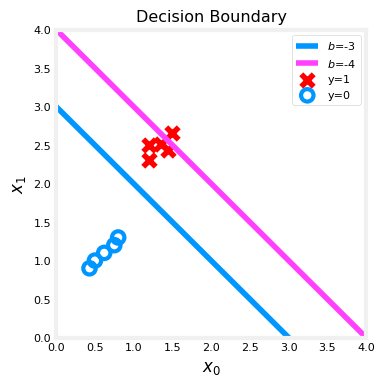

In [121]:
# Choose values between 0 and 6
x0 = np.arange(0, 6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c=dlc["dlblue"], label="$b$=-3")
ax.plot(x0,x1_other, c=dlc["dlmagenta"], label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [122]:
w_array1 = np.random.randint(2, size=[2, 10])
b_1 = -3
w_array2 = np.random.randint(2, size=[2, 10])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  [0.31 0.96 0.56 0.31 0.56 0.31 1.55 0.96 1.55 1.55]
Cost for b = -4 :  [0.45 0.45 0.45 2.02 2.02 0.88 0.45 1.38 0.88 2.02]
